In [2]:
%matplotlib inline

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pickle
from vtk_rw import read_vtk
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Load data

In [4]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

In [5]:
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_infl1000.vtk'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'
rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_infl1000.vtk'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'
fullmask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_new.npy'
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)
fullmask = np.load(fullmask_file)

In [6]:
embed_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed.npy'
dict_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed_dict.pkl'
embed_dict = load_pickle(dict_file)
# normalize vectors
embed_masked = np.zeros((embed_dict['vectors'].shape[0], embed_dict['vectors'].shape[1]-1))
for comp in range(100):
    embed_masked[:,comp]=(embed_dict['vectors'][:,comp+1]/embed_dict['vectors'][:,0])

# unmask the embedding, that has been saved in masked form
idcs=np.arange(0,(lv.shape[0]+rv.shape[0]))
nonmask=np.delete(idcs, fullmask)
embed = np.zeros(((lv.shape[0]+rv.shape[0]),100))
embed[nonmask] = embed_masked

In [7]:
t1_predict_file_0 = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/both_t1avg_by_fc_maps_0.pkl'
t1_predict_0 = load_pickle(t1_predict_file_0)
scatter_mask = np.where(t1_predict_0['t1']>1500)

In [73]:
FC1 = -embed[:,0][scatter_mask]
T1 = t1_predict_0['t1'][scatter_mask]

### Fitting

In [9]:
def linear(x, b0, b1):
    return b0+b1*x

In [10]:
def sigmoid(x, height, theta, xshift, yshift):
    return height / (1. + np.exp(-theta*(x-xshift))) + yshift

In [32]:
def polynomial_2(xs, b0, b1, b2):
    return b0 + b1*xs + b2*xs**2

In [11]:
def polynomial_3(xs, b0, b1, b2, b3):
    return b0 + b1*xs + b2*xs**2 + b3*xs**3

In [12]:
def polynomial_4(xs, b0, b1, b2, b3, b4):
    return b0 + b1*xs + b2*xs**2 + b3*xs**3 + b4*xs**4

In [13]:
def polynomial_5(xs, b0, b1, b2, b3, b4, b5):
    return b0 + b1*xs + b2*xs**2 + b3*xs**3 + b4*xs**4 + b5*xs**5

In [14]:
xdata = FC1
ydata = (T1-np.mean(T1))/np.std(T1)
x = np.linspace(-2,2,100) #xdata.min(), xdata.max(), 100)

In [15]:
fitted_parms_lin, _ = curve_fit(linear, xdata, ydata)
predicted_ys_lin = linear(x, *fitted_parms_lin)
predicted_T1_line_lin = predicted_ys_lin*np.std(T1)+np.mean(T1)
predicted_T1_lin = linear(FC1, *fitted_parms_lin)*np.std(T1)+np.mean(T1)

In [33]:
fitted_parms_poly2, _ = curve_fit(polynomial_2, xdata, ydata)
predicted_ys_poly2 = polynomial_2(x, *fitted_parms_poly2)
predicted_T1_line_poly2 = predicted_ys_poly2*np.std(T1)+np.mean(T1)
predicted_T1_poly2 = polynomial_2(FC1, *fitted_parms_poly2)*np.std(T1)+np.mean(T1)

In [16]:
fitted_parms_sigmoid, _ = curve_fit(sigmoid, xdata, ydata)
predicted_ys_sigmoid = sigmoid(x, *fitted_parms_sigmoid)
predicted_T1_line_sig = predicted_ys_sigmoid*np.std(T1)+np.mean(T1)
predicted_T1_sig = sigmoid(FC1, *fitted_parms_sigmoid)*np.std(T1)+np.mean(T1)

In [17]:
fitted_parms_poly3, _ = curve_fit(polynomial_3, xdata, ydata)
predicted_ys_poly3 = polynomial_3(x, *fitted_parms_poly3)
predicted_T1_line_poly3 = predicted_ys_poly3*np.std(T1)+np.mean(T1)
predicted_T1_poly3 = polynomial_3(FC1, *fitted_parms_poly3)*np.std(T1)+np.mean(T1)

In [18]:
fitted_parms_poly4, _ = curve_fit(polynomial_4, xdata, ydata)
predicted_ys_poly4 = polynomial_4(x, *fitted_parms_poly4)
predicted_T1_line_poly4 = predicted_ys_poly4*np.std(T1)+np.mean(T1)
predicted_T1_poly4 = polynomial_4(FC1, *fitted_parms_poly4)*np.std(T1)+np.mean(T1)

In [19]:
fitted_parms_poly5, _ = curve_fit(polynomial_5, xdata, ydata)
predicted_ys_poly5 = polynomial_5(x, *fitted_parms_poly5)
predicted_T1_line_poly5 = predicted_ys_poly5*np.std(T1)+np.mean(T1)
predicted_T1_poly5 = polynomial_5(FC1, *fitted_parms_poly5)*np.std(T1)+np.mean(T1)

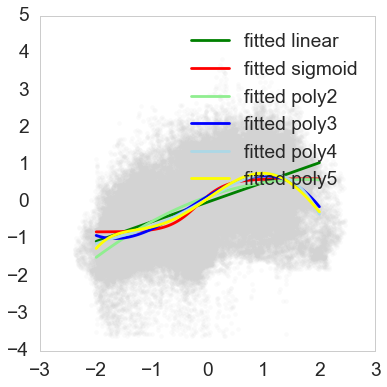

In [34]:
fig=plt.figure(figsize=(6,6))
plt.scatter(xdata, ydata, color='lightgrey', linewidth=0, alpha=0.1)
plt.plot(x, predicted_ys_lin, color='green', label='fitted linear')
plt.plot(x, predicted_ys_sigmoid, color='red', label='fitted sigmoid')
plt.plot(x, predicted_ys_poly2, color='lightgreen', label='fitted poly2')
plt.plot(x, predicted_ys_poly3, color='blue', label='fitted poly3')
plt.plot(x, predicted_ys_poly4, color='lightblue', label='fitted poly4')
plt.plot(x, predicted_ys_poly5, color='yellow', label='fitted poly5')
plt.legend()


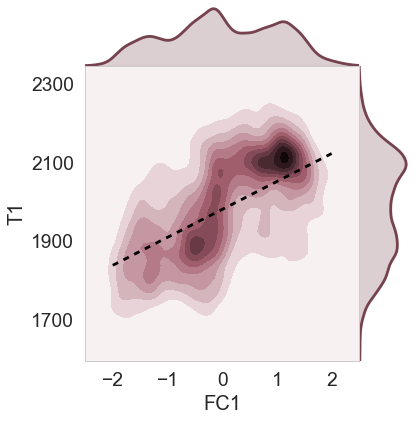

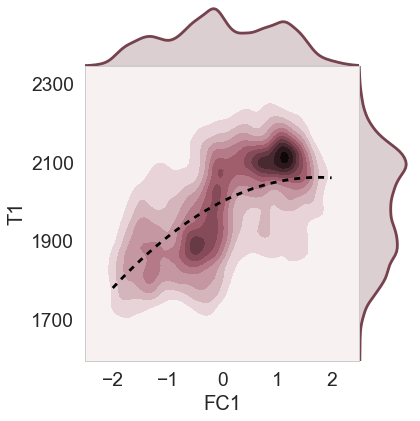

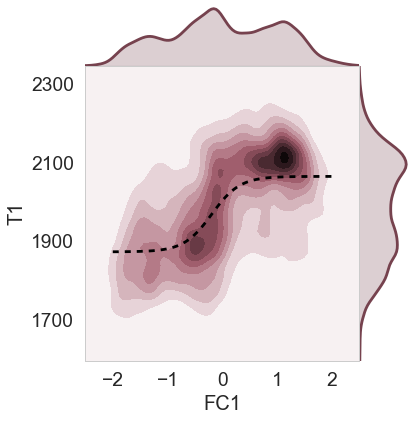

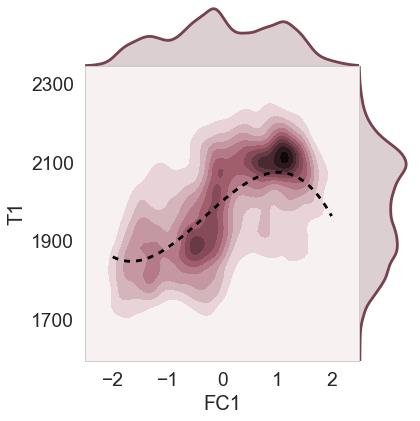

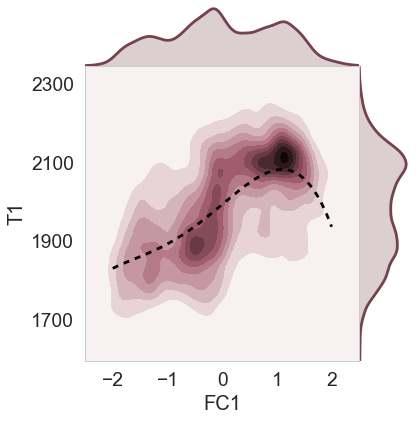

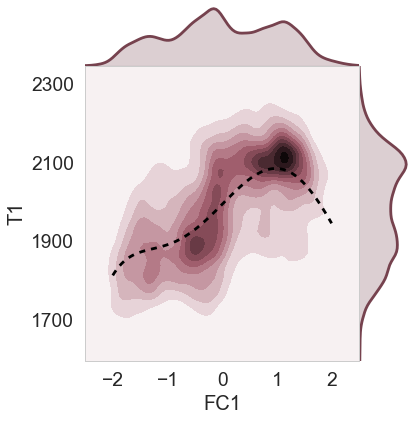

In [41]:
import seaborn as sns
sns.set_style('whitegrid',{'axes.grid': False})
sns.set_context('poster', font_scale=1.2)
scatter_mask = np.where(t1_predict_0['t1']>1500)

xlim = (-2.5, 2.5)
ylim = (1600, 2350)
yticks = [1700, 1900,2100, 2300]
scatter_color = sns.xkcd_rgb['brownish purple']
levels = 10

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(x, predicted_T1_line_lin, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
#fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_lin.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(x, predicted_T1_line_poly2, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
#fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_poly2.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(x, predicted_T1_line_sig, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
#fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_sig.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(x, predicted_T1_line_poly3, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
#fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_poly3.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(x, predicted_T1_line_poly4, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
#fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_poly4.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(x, predicted_T1_line_poly5, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
#fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_poly5.png')

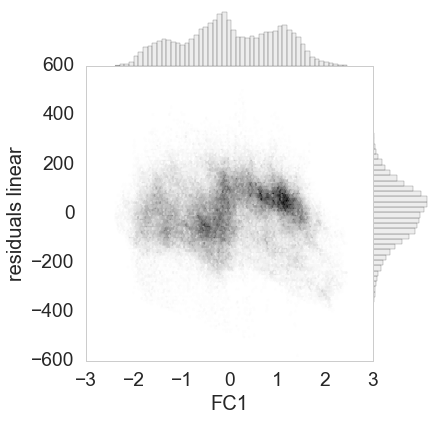

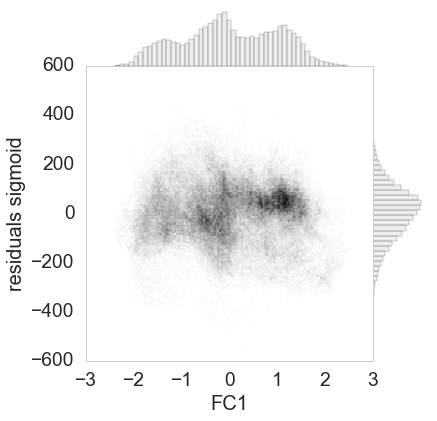

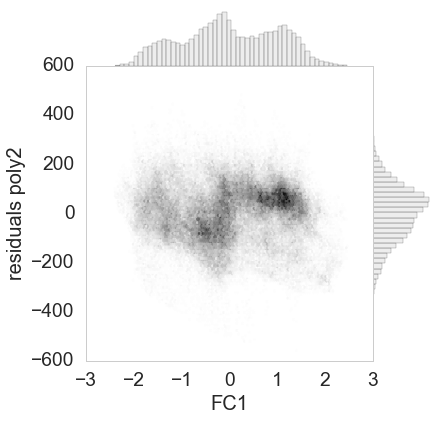

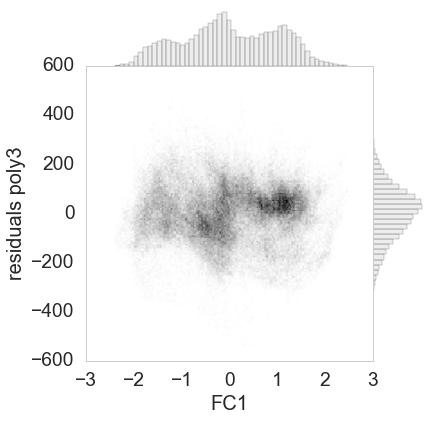

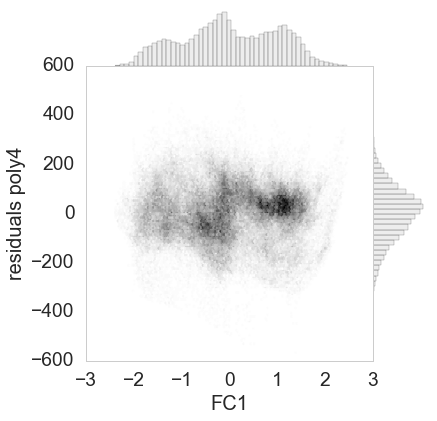

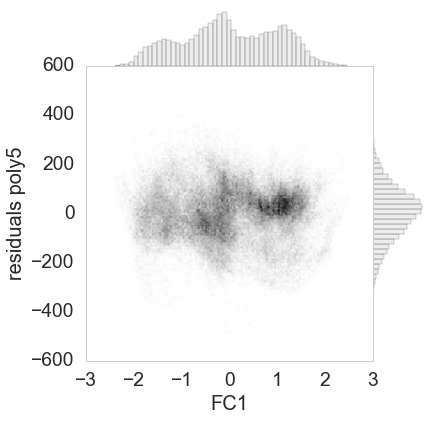

In [42]:
fig = sns.jointplot(FC1, T1-predicted_T1_lin,
                    stat_func=None,space=0,
                    kind="hex", size=6, color='lightgrey')
fig.set_axis_labels('FC1', 'residuals linear', fontsize=20)

fig = sns.jointplot(FC1, T1-predicted_T1_sig,
                    stat_func=None,space=0,
                    kind="hex", size=6, color='lightgrey')
fig.set_axis_labels('FC1', 'residuals sigmoid', fontsize=20)

fig = sns.jointplot(FC1, T1-predicted_T1_poly2,
                    stat_func=None,space=0,
                    kind="hex", size=6, color='lightgrey')
fig.set_axis_labels('FC1', 'residuals poly2', fontsize=20)

fig = sns.jointplot(FC1, T1-predicted_T1_poly3,
                    stat_func=None,space=0,
                    kind="hex", size=6, color='lightgrey')
fig.set_axis_labels('FC1', 'residuals poly3', fontsize=20)

fig = sns.jointplot(FC1, T1-predicted_T1_poly4,
                    stat_func=None,space=0,
                    kind="hex", size=6, color='lightgrey')
fig.set_axis_labels('FC1', 'residuals poly4', fontsize=20)

fig = sns.jointplot(FC1, T1-predicted_T1_poly5,
                    stat_func=None,space=0,
                    kind="hex", size=6, color='lightgrey')
fig.set_axis_labels('FC1', 'residuals poly5', fontsize=20)

In [37]:
import scipy.stats as stats

In [38]:
print 'linear', stats.pearsonr(T1, predicted_T1_lin)[0], stats.pearsonr(T1, predicted_T1_lin)[0]**2
print 'sigmoid', stats.pearsonr(T1, predicted_T1_sig)[0], stats.pearsonr(T1, predicted_T1_sig)[0]**2
print 'poly2', stats.pearsonr(T1, predicted_T1_poly2)[0], stats.pearsonr(T1, predicted_T1_poly2)[0]**2
print 'poly3', stats.pearsonr(T1, predicted_T1_poly3)[0], stats.pearsonr(T1, predicted_T1_poly3)[0]**2
print 'poly4', stats.pearsonr(T1, predicted_T1_poly4)[0], stats.pearsonr(T1, predicted_T1_poly4)[0]**2
print 'poly5', stats.pearsonr(T1, predicted_T1_poly5)[0], stats.pearsonr(T1, predicted_T1_poly5)[0]**2

linear 0.528208342431 0.279004053013
sigmoid 0.570254760639 0.325190492032
poly2 0.550710660653 0.303282231757
poly3 0.584902843591 0.342111336441
poly4 0.589411302197 0.347405683157
poly5 0.593297764529 0.352002237396


In [39]:
sigma2_res = 133.267283633
def BIC(n_params, residuals, data, sigma2_res):
    p = n_params
    n = residuals.shape[0]
    data_range = data.max()-data.min()
    bic = (1-p) * np.log(2*np.pi*sigma2_res) + (1./sigma2_res) * (1./n) * np.sum(residuals**2) + p*np.log(data_range**2)
    return bic

In [40]:
print 'BIC lin', BIC(2, T1-predicted_T1_lin, T1, sigma2_res)
print 'BIC sigmoid', BIC(4, T1-predicted_T1_sig, T1, sigma2_res)
print 'BIC poly2', BIC(3, T1-predicted_T1_poly2, T1, sigma2_res)
print 'BIC poly3', BIC(4, T1-predicted_T1_poly3, T1, sigma2_res)
print 'BIC poly4', BIC(5, T1-predicted_T1_poly4, T1, sigma2_res)
print 'BIC poly5', BIC(6, T1-predicted_T1_poly5, T1, sigma2_res)

BIC lin 118.651724109
BIC sigmoid 126.564760499
BIC poly2 122.447595005
BIC poly3 124.270767704
BIC poly4 130.640314762
BIC poly5 137.104462944


### Estimate covariance with sandwich estimator 

http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html

http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.sandwich_covariance.cov_hac.html#statsmodels.stats.sandwich_covariance.cov_hac

In [291]:
import statsmodels.api as sm

In [290]:
X = np.column_stack((np.ones(FC1.shape), FC1, FC1**2, FC1**3))

In [292]:
model = sm.OLS(T1, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 2.090e+04
Date:                Mon, 11 Jul 2016   Prob (F-statistic):               0.00
Time:                        14:32:19   Log-Likelihood:            -7.3668e+05
No. Observations:              120559   AIC:                         1.473e+06
Df Residuals:                  120555   BIC:                         1.473e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2005.3895      0.433   4627.799      0.0

In [308]:
print 'HC0 robust standard errors ', results.HC0_se

robust standard errors  [ 0.44867552  0.64045175  0.29782973  0.26647802]


In [312]:
print 'HC0 robust confidence intervals'
print [results.params[0]-1.96*results.HC0_se[0], results.params[0]+1.96*results.HC0_se[0]]
print [results.params[1]-1.96*results.HC0_se[1], results.params[1]+1.96*results.HC0_se[1]]
print [results.params[2]-1.96*results.HC0_se[2], results.params[2]+1.96*results.HC0_se[2]]
print [results.params[3]-1.96*results.HC0_se[3], results.params[3]+1.96*results.HC0_se[3]]

HC0 robust confidence intervals
[2004.5100590389718, 2006.2688670721693]
[117.76085948310764, 120.27143032636231]
[-23.020148314030532, -21.852655762707617]
[-23.794438223528001, -22.74984440159918]


In [317]:
print 'classic covariance matrix'
results.cov_params()

array([[ 0.18777962,  0.00145948, -0.08943381, -0.0033965 ],
       [ 0.00145948,  0.43603164, -0.0128934 , -0.16017996],
       [-0.08943381, -0.0128934 ,  0.0900097 ,  0.00825948],
       [-0.0033965 , -0.16017996,  0.00825948,  0.07611714]])

In [314]:
print 'HC0 robust covariance matrix'
results.cov_HC0

HC0 robust covariance matrix


array([[ 0.20130972, -0.01095711, -0.09518545, -0.00063213],
       [-0.01095711,  0.41017844, -0.0151753 , -0.15057   ],
       [-0.09518545, -0.0151753 ,  0.08870255,  0.01023153],
       [-0.00063213, -0.15057   ,  0.01023153,  0.07101053]])

In [320]:
import statsmodels.stats as sms
print 'HAC robust covariance matrix'
sms.sandwich_covariance.cov_hac(results)

HAC robust covariance matrix


array([[ 1.98474828, -0.35605331, -0.79387881,  0.13987919],
       [-0.35605331,  3.28348451,  0.08308834, -1.0757576 ],
       [-0.79387881,  0.08308834,  0.67156355, -0.04605766],
       [ 0.13987919, -1.0757576 , -0.04605766,  0.46968998]])

In [324]:
import scipy.stats as sps
print 'classic p', sps.norm.sf(abs(results.params[0]/results.bse[0]))*2
print 'robust  p', sps.norm.sf(abs(results.params[0]/results.HC0_se[0]))*2

classic p 0.0
robust  p 0.0


### Fitting improved model

In [76]:
t1_predict_file_best = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/both_t1avg_by_fc_maps_best.pkl'
t1_predict_best = load_pickle(t1_predict_file_best)

In [83]:
FCbest=t1_predict_best['modelled_fit'][scatter_mask]
xbest = np.linspace(1850,2150,100)

In [86]:
fitted_parms_lin_best, _ = curve_fit(linear, FCbest, T1)
predicted_T1_line_lin_best = linear(xbest, *fitted_parms_lin_best)
predicted_T1_lin_best = linear(FCbest, *fitted_parms_lin_best)

In [87]:
fitted_parms_poly2_best, _ = curve_fit(polynomial_2, FCbest, T1)
predicted_T1_line_poly2_best = polynomial_2(xbest, *fitted_parms_poly2_best)
predicted_T1_poly2_best = polynomial_2(FCbest, *fitted_parms_poly2_best)

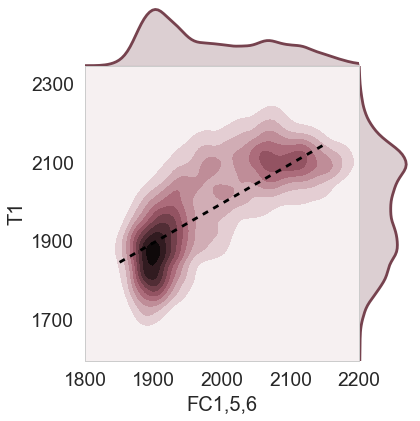

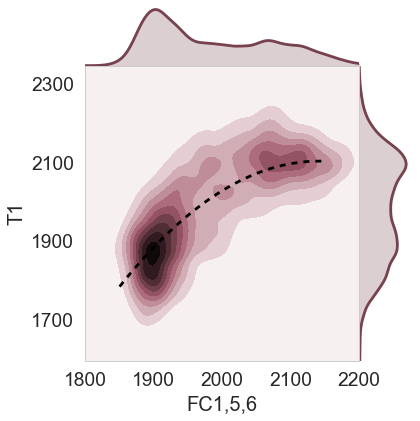

In [91]:
xlim = (1800, 2200)
ylim = (1600, 2350)
yticks = [1700, 1900, 2100, 2300]
xticks = [1800, 1900, 2000, 2100, 2200]

fig = sns.jointplot(FCbest, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(xbest, predicted_T1_line_lin_best, 'k--')  
fig.set_axis_labels('FC1,5,6', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
fig.ax_joint.set_xticks(xticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_lin_best.png')

fig = sns.jointplot(FCbest, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels)
fig.ax_joint.plot(xbest, predicted_T1_line_poly2_best, 'k--')  
fig.set_axis_labels('FC1,5,6', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
fig.ax_joint.set_xticks(xticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/s1_poly2_best.png')

In [89]:
print 'linear', stats.pearsonr(T1, predicted_T1_lin_best)[0], stats.pearsonr(T1, predicted_T1_lin_best)[0]**2
print 'poly2', stats.pearsonr(T1, predicted_T1_poly2_best)[0], stats.pearsonr(T1, predicted_T1_poly2_best)[0]**2

linear 0.667511548784 0.445571667761
poly2 0.698399696033 0.487762135419


In [90]:
print 'BIC lin', BIC(2, T1-predicted_T1_lin_best, T1, sigma2_res)
print 'BIC poly2', BIC(3, T1-predicted_T1_poly2_best, T1, sigma2_res)

BIC lin 96.0698186923
BIC poly2 97.4372846752
